In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Exercise

 - Import data on emotion
 - Train a CNN to classify by emotion (Angry, Disgust, Fear, Happy...)
 - Use Data augmentaion techinques to improve you accuracy
 - Compare your results with DeepFace Library https://pypi.org/project/deepface/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tabulate import tabulate

import cv2 as cv
import pathlib
from PIL import Image

from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

from skimage import color

In [3]:
url = '/content/drive/MyDrive/Advanced Data Analytics UAX-20231025T214223Z-001/Advanced Data Analytics UAX/data/4.-CNN/emotions'
data = pathlib.Path(url)
paths = {
    "Angry": list(data.glob('Angry/*.png')),
    "Disgust": list(data.glob('Disgust/*.png')),
    "Fear": list(data.glob('Fear/*.png')),
    "Happy" : list(data.glob('Happy/*.png')),
    "Neutral" : list(data.glob('Neutral/*.png')),
    "Sad" : list(data.glob('Sad/*.png')),
    "Surprise" : list(data.glob('Surprise/*.png'))
}

labels = {
    "Angry" : 0,
    "Disgust":1,
    "Fear":2,
    "Happy":3,
    "Neutral":4,
    "Sad":5,
    "Surprise":6
}

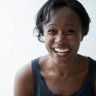

In [4]:
Image.open(str(paths["Happy"][0]))

In [6]:
X=[]
y=[]

for name, images in paths.items():
    for image in images:
        try:
            image = str(image).strip()
            img = cv.imread(image)
            img_resize = cv.resize(img,(200,200))
            X.append(img_resize)
            y.append(labels[name])

        except:
            print('Except')

X1 = np.array(X)
X2 = color.rgb2gray(X1)
y = np.array(y)

# Obtén una permutación aleatoria para los índices de los arrays
indices = np.random.permutation(len(X))

# Baraja los arrays usando los índices permutados
X1 = X1[indices]
X2 = X2[indices]
y = y[indices]

X1.shape

(221, 200, 200, 3)

In [7]:
for label in y:
  print(label)

6
0
4
1
5
1
3
0
2
5
6
2
6
0
0
6
0
0
6
4
6
4
2
3
5
0
5
1
5
1
4
5
2
5
3
0
2
1
5
6
2
6
0
2
3
4
0
1
3
1
4
3
4
3
5
6
0
5
4
1
3
6
2
2
3
3
6
3
6
0
2
6
4
0
4
6
6
0
2
2
4
0
4
1
2
6
1
1
0
3
1
3
4
4
6
2
0
5
0
0
3
1
2
5
4
4
0
0
6
2
4
5
1
3
2
0
4
6
6
4
1
5
6
3
3
4
0
6
2
5
5
5
1
1
0
2
3
0
3
0
0
6
3
3
1
3
2
3
6
3
0
1
4
5
3
3
3
2
5
6
0
4
4
2
5
3
4
0
4
6
6
6
5
5
5
3
0
5
4
3
3
3
3
1
2
2
2
3
5
6
5
5
0
1
1
0
2
0
3
1
1
3
4
4
5
4
0
2
0
0
6
1
2
5
3
2
5
3
4
2
1


Text(0, 0.5, 'Count')

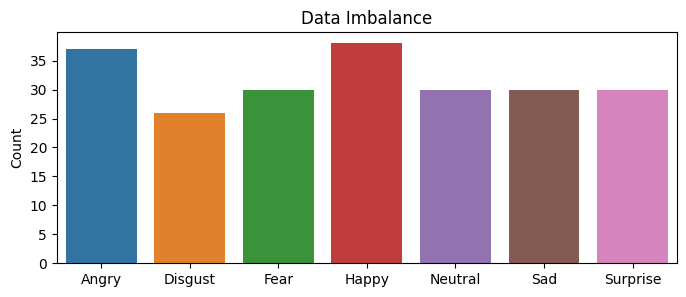

In [8]:
plt.figure(figsize=(8, 3))
g = sns.countplot(x = y)
g.set_xticks(range(len(list(labels.keys()))))
g.set_xticklabels(list(labels.keys()))
plt.title('Data Imbalance')
# plt.xlabel('emotions')
plt.ylabel('Count')

In [9]:
y = to_categorical(y)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X1, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)
X_train2.shape

(176, 200, 200, 3)

In [10]:
from tensorflow.keras import optimizers

model = Sequential()
model.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(200,200,1)))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2), strides=1, padding="valid"))
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.4))
model.add(MaxPooling2D())
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.4))
model.add(MaxPooling2D())
model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dense(7,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      320       
                                                                 
 dropout (Dropout)           (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 199, 199, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 199, 199, 64)      18496     
                                                                 
 dropout_1 (Dropout)         (None, 199, 199, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 99, 99, 64)        0         
 g2D)                                                   

In [31]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/10
6/6 [==============================] - 10s 805ms/step - loss: 5.8438 - acc: 0.1534 - val_loss: 1.9466 - val_acc: 0.1778
Epoch 2/10
6/6 [==============================] - 1s 241ms/step - loss: 1.9473 - acc: 0.1705 - val_loss: 1.9518 - val_acc: 0.0889
Epoch 3/10
6/6 [==============================] - 1s 239ms/step - loss: 1.9156 - acc: 0.2045 - val_loss: 1.9484 - val_acc: 0.0889
Epoch 4/10
6/6 [==============================] - 1s 234ms/step - loss: 1.8680 - acc: 0.2102 - val_loss: 1.9324 - val_acc: 0.1778
Epoch 5/10
6/6 [==============================] - 1s 236ms/step - loss: 1.7881 - acc: 0.2784 - val_loss: 1.9006 - val_acc: 0.1778
Epoch 6/10
6/6 [==============================] - 1s 237ms/step - loss: 1.7036 - acc: 0.3693 - val_loss: 1.8254 - val_acc: 0.2444
Epoch 7/10
6/6 [==============================] - 1s 237ms/step - loss: 1.5537 - acc: 0.4148 - val_loss: 1.8498 - val_acc: 0.2889
Epoch 8/10
6/6 [==============================] - 1s 238ms/step - loss: 1.3783 - acc: 0.5

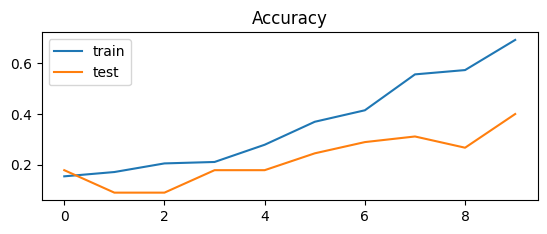

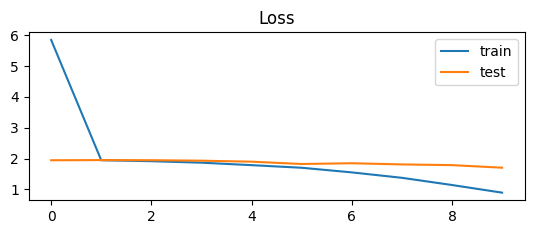

In [32]:
plt.subplot(211)
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show()

plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [11]:
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    # rescale=1./255,
    rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.4,
    # brightness_range = [0.2, 0.5],
    vertical_flip = True,
    horizontal_flip = True,
    zoom_range = 0.2
    )

# img_gen.fit(X_train)
augmented_data_generator  = img_gen.flow(X_train2, y_train2, batch_size=300) # ,subset='training',shuffle=True
batch = augmented_data_generator.next()

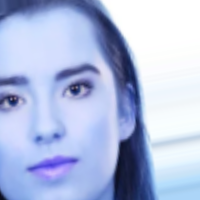

In [12]:
imagen = Image.fromarray(np.uint8(batch[0][32]))
imagen

In [13]:
X_train_aug = np.concatenate((X_train2, batch[0]), axis=0)
y_train_aug = np.concatenate((y_train2, batch[1]), axis=0)
X_train_aug.shape

(352, 200, 200, 3)

In [21]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(200,200,3)))
model.add(Dropout(0.4))
model.add(MaxPooling2D(pool_size=(2, 2), strides=1, padding="valid"))
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.4))
model.add(MaxPooling2D())
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D())
model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(7,activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 200, 200, 32)      896       
                                                                 
 dropout_16 (Dropout)        (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 199, 199, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 199, 199, 64)      18496     
                                                                 
 dropout_17 (Dropout)        (None, 199, 199, 64)      0         
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 99, 99, 64)        0         
 ng2D)                                                

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_train_aug, y_train_aug, epochs=10, validation_data=(X_test2,y_test2), batch_size=32)

Epoch 1/10
11/11 [==============================] - 4s 262ms/step - loss: 1370.8831 - acc: 0.1619 - val_loss: 1.9460 - val_acc: 0.1333
Epoch 2/10
11/11 [==============================] - 3s 237ms/step - loss: 1.9266 - acc: 0.1733 - val_loss: 1.9442 - val_acc: 0.2000
Epoch 3/10
11/11 [==============================] - 3s 239ms/step - loss: 1.7886 - acc: 0.3295 - val_loss: 1.9050 - val_acc: 0.2889
Epoch 4/10
11/11 [==============================] - 3s 236ms/step - loss: 1.4461 - acc: 0.5341 - val_loss: 1.8832 - val_acc: 0.2444
Epoch 5/10
11/11 [==============================] - 3s 236ms/step - loss: 0.9965 - acc: 0.6847 - val_loss: 1.7226 - val_acc: 0.4000
Epoch 6/10
11/11 [==============================] - 3s 236ms/step - loss: 0.5212 - acc: 0.8267 - val_loss: 1.8241 - val_acc: 0.2667
Epoch 7/10
11/11 [==============================] - 3s 237ms/step - loss: 0.2299 - acc: 0.9432 - val_loss: 1.8316 - val_acc: 0.3778
Epoch 8/10
11/11 [==============================] - 3s 246ms/step - loss:

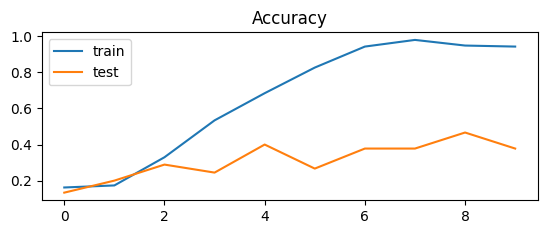

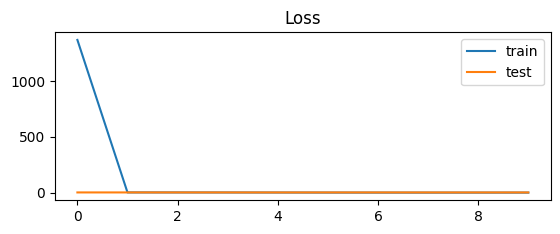

In [23]:
plt.subplot(211)
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show()

plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## Deepface


In [24]:
!pip install deepface
from deepface import DeepFace

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 11.4 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116933 sha256=4a3981eeb75c18f97994f419d843cd4cc9f3b27c02f0518e30c64675d2002308
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire
Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [25]:

objs = DeepFace.analyze(img_path = '/content/drive/MyDrive/Advanced Data Analytics UAX-20231025T214223Z-001/Advanced Data Analytics UAX/data/4.-CNN/emotions/Happy/image 9.png',
        actions = ['age', 'gender', 'race', 'emotion'])
objs

facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 71.8MB/s]


age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5
100%|██████████| 539M/539M [00:04<00:00, 115MB/s]


gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5
100%|██████████| 537M/537M [00:07<00:00, 73.9MB/s]


race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /root/.deepface/weights/race_model_single_batch.h5
100%|██████████| 537M/537M [00:06<00:00, 78.0MB/s]
Action: emotion: 100%|██████████| 4/4 [00:02<00:00,  1.82it/s]


[{'age': 22,
  'region': {'x': 15, 'y': 18, 'w': 62, 'h': 62},
  'gender': {'Woman': 2.4317776784300804, 'Man': 97.56821990013123},
  'dominant_gender': 'Man',
  'race': {'asian': 2.6724970325631148e-05,
   'indian': 0.0008598405656812247,
   'black': 9.12765329985632e-07,
   'white': 96.18042707443237,
   'middle eastern': 3.5173285752534866,
   'latino hispanic': 0.3013610141351819},
  'dominant_race': 'white',
  'emotion': {'angry': 0.68914633626618,
   'disgust': 1.8245933852213531e-06,
   'fear': 0.3170336087142592,
   'happy': 96.9195304465014,
   'sad': 0.004513981089829271,
   'surprise': 2.0323156659195223,
   'neutral': 0.03746069783576267},
  'dominant_emotion': 'happy'}]

In [28]:
imagen = str('/content/drive/MyDrive/Advanced Data Analytics UAX-20231025T214223Z-001/Advanced Data Analytics UAX/data/4.-CNN/emotions/Happy/image 9.png').strip()
img = cv.imread(imagen)
imagen = cv.resize(img,(200,200))
imagen=imagen.reshape(1,200,200,3)
model.predict(imagen)

1/1 [==============================] - 0s 389ms/step


array([[0.15859905, 0.02914591, 0.04639671, 0.44708636, 0.10494293,
        0.17934164, 0.03448745]], dtype=float32)